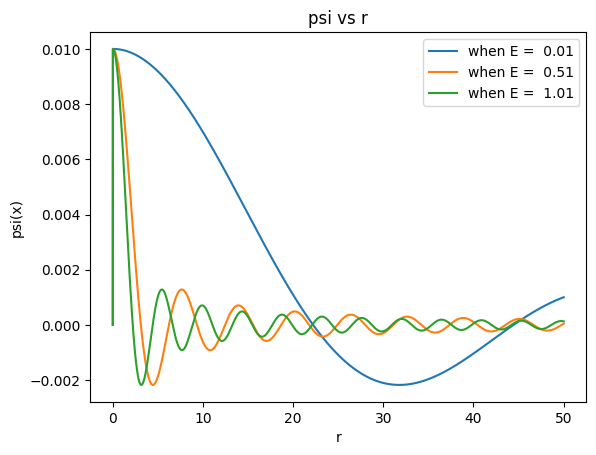

when E =  [0.01, 0.51, 1.01]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# the parameters for the case when we want to start shooting
a = 50
dx = 0.01
E_start = 0
dE = 0.01
max_E = 100  
energy_levels = []  
max_levels_of_energy = 3  
l= 0
hbar=1
m=1

def dif_Phi (r , function_R , l , ENG , dif_1R ) :
  if r==0:
    return 0
  else :
    return -(2/r)*dif_1R  - ((2*m/hbar**2)*(ENG - l*(l+1)/r**2)*function_R)


def rk2_step(psi, phi, r, E, dx, l):
    dif_1R = phi
    k1 = phi * dx
    l1 = dif_Phi(r, psi, l, E, dif_1R) * dx
    k2 = (phi + l1) * dx
    l2 = dif_Phi(r + dx, psi + k1, l, E, phi + l1) * dx
    return psi +(k1+k2)/2 , phi +(l1+l2)/2


# the start of shooting
E = E_start
while E < max_E and len(energy_levels) < max_levels_of_energy:
    psi = 0
    dpsi = 1  # for the start like l = 0 we set dpsi = 1
    r = 0
    Lpsi = [psi]
    Lr = [r]

    while r < a:
        psi, dpsi = rk2_step(psi, dpsi, r , E, dx,l)
        r += dx
        Lpsi.append(psi)
        Lr.append(r)

    if abs(Lpsi[-1]) < 0.01:  # threshold
        energy_levels.append(E)
        plt.plot(Lr, Lpsi, label=f"when E =  {E:.2f}")
        E += 0.5 
    else:
        E += dE

plt.legend()
plt.title("psi vs r")
plt.xlabel("r")
plt.ylabel("psi(x)")
plt.show()

print("when E = ", energy_levels)
